# UFCFVQ-15-M Programming for Data Science (Spring 2022)
# Programming Task 2

## Student Id:

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame


In [1]:
import pandas as pd
data1 = pd.read_csv('task2a.csv')
data2 = pd.read_csv('task2b.csv')

df = pd.merge(data1,data2)
df

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,3
...,...,...,...,...,...,...,...,...
17409,03/01/2017 19:00,1042,5.0,1.0,81.0,19.0,0,3
17410,03/01/2017 20:00,541,5.0,1.0,81.0,21.0,0,3
17411,03/01/2017 21:00,337,5.5,1.5,78.5,24.0,0,3
17412,03/01/2017 22:00,224,5.5,1.5,76.0,23.0,0,3


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>


### Requirement FR10 - Clean the merged data

In [2]:
df.drop(['season_code'], axis = 1, inplace = True)
df_filter = df[df['new_bike_shares'] > 20]

print(df_filter.head(10))

          timestamp  new_bike_shares  temperature  feels_like_temp  humidity  \
0  04/01/2015 00:00              182          3.0              2.0      93.0   
1  04/01/2015 01:00              138          3.0              2.5      93.0   
2  04/01/2015 02:00              134          2.5              2.5      96.5   
3  04/01/2015 03:00               72          2.0              2.0     100.0   
4  04/01/2015 04:00               47          2.0              0.0      93.0   
5  04/01/2015 05:00               46          2.0              2.0      93.0   
6  04/01/2015 06:00               51          1.0             -1.0     100.0   
7  04/01/2015 07:00               75          1.0             -1.0     100.0   
8  04/01/2015 08:00              131          1.5             -1.0      96.5   
9  04/01/2015 09:00              301          2.0             -0.5     100.0   

   wind_speed  is_weekend  
0         6.0           1  
1         5.0           1  
2         0.0           1  
3      

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the distribution of bike shares by time of the day

In [3]:
#Coverting timestamp to datetime in pandas

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

timestamp          datetime64[ns]
new_bike_shares             int64
temperature               float64
feels_like_temp           float64
humidity                  float64
wind_speed                float64
is_weekend                  int64
dtype: object

In [4]:
df.dtypes

timestamp          datetime64[ns]
new_bike_shares             int64
temperature               float64
feels_like_temp           float64
humidity                  float64
wind_speed                float64
is_weekend                  int64
dtype: object

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

timestamp          datetime64[ns]
new_bike_shares             int64
temperature               float64
feels_like_temp           float64
humidity                  float64
wind_speed                float64
is_weekend                  int64
dtype: object

In [6]:
#Creating new columns for year, month, days, hours and name of the day

df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["day"] = df["timestamp"].dt.day
df["hour"] = df["timestamp"].dt.hour
df["datetime-dayofweek"] = df["timestamp"].dt.dayofweek
df.head()

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,year,month,day,hour,datetime-dayofweek
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,1,2015,4,1,0,2
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,2015,4,1,1,2
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,2015,4,1,2,2
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,2015,4,1,3,2
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,2015,4,1,4,2


In [7]:
#Converting int values of days to actual names of days

df.loc[df["datetime-dayofweek"] == 0, "weekday"] = "Monday"
df.loc[df["datetime-dayofweek"] == 1, "weekday"] = "Tuesday"
df.loc[df["datetime-dayofweek"] == 2, "weekday"] = "Wednesday"
df.loc[df["datetime-dayofweek"] == 3, "weekday"] = "Thursday"
df.loc[df["datetime-dayofweek"] == 4, "weekday"] = "Friday"
df.loc[df["datetime-dayofweek"] == 5, "weekday"] = "Saturday"
df.loc[df["datetime-dayofweek"] == 6, "weekday"] = "Sunday"
df.head()

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,year,month,day,hour,datetime-dayofweek,weekday
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,1,2015,4,1,0,2,Wednesday
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,2015,4,1,1,2,Wednesday
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,2015,4,1,2,2,Wednesday
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,2015,4,1,3,2,Wednesday
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,2015,4,1,4,2,Wednesday


In [8]:
#Altering the dataframe
column = ["year","month","day","hour","weekday","new_bike_shares","is_weekend","feels_like_temp"]
df = df[column]
df.head()

,year,month,day,hour,weekday,new_bike_shares,is_weekend,feels_like_temp
0,2015,4,1,0,Wednesday,182,1,2.0
1,2015,4,1,1,Wednesday,138,1,2.5
2,2015,4,1,2,Wednesday,134,1,2.5
3,2015,4,1,3,Wednesday,72,1,2.0
4,2015,4,1,4,Wednesday,47,1,0.0


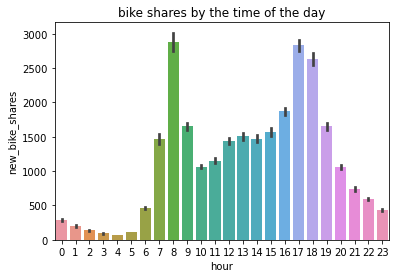

In [9]:
#Performing Plotting with matplot and seaborn

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x="hour", y="new_bike_shares").set_title('bike shares by the time of the day')
plt.show()

The distribution of bike sharing hase been increased at 7-9 and 17-19. On a daily basis at around 8 is the largest distribution count than any other hour. On a daily basis at around 4 is the smallest distribution count than any other hour. From 12 - 3 There's an almost average distribution of bike_shares.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Compare the distribution of bike shares by time of the week

<AxesSubplot:ylabel='is_weekend'>

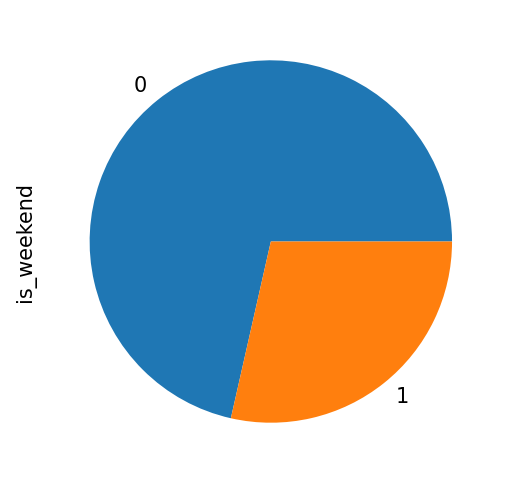

In [41]:
#Pie Chart to analyse the weekdays and weekends contribution towards the dataframe
plt.figure(dpi=150)
df.is_weekend.value_counts().plot(kind="pie")

There's a high count of weekdays in this data frame

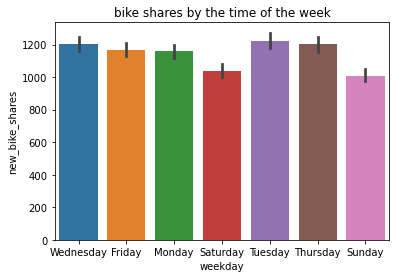

In [43]:
sns.barplot(data=df, x="weekday", y="new_bike_shares").set_title('bike shares by the time of the week')
plt.show()

By analysing the above bar plot, A conclusion can be drawn that the weekends have distributed less bikes than weekdays

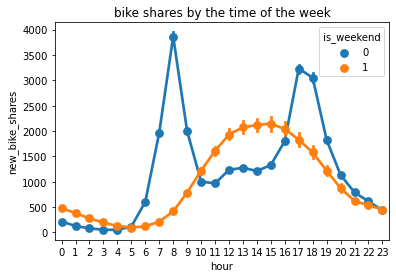

In [45]:
sns.pointplot(data=df, x="hour", y="new_bike_shares", hue='is_weekend').set_title('bike shares by the time of the week')
plt.show()

By analysing the above point plot The weekends hourly distributed bikes count is relatively lower than the weekdays hourly distributed bikes count. The most bikes that has been distributed in weekend is at 14 - 15 while the most bikes that has been distributed in weekday is at 8.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of “feels like” temperature on the number of bike shares

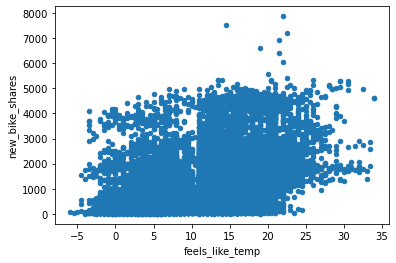

In [44]:
#Creating scatter plot for comparison

df.plot(kind='scatter', x='feels_like_temp', y='new_bike_shares')
plt.show()

The above scatter plot displays that "feels_like_temp" and "bike shares has a monotonic relationship.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

In [22]:
#Analysing the correlation between mentioned columns

df[['feels_like_temp', 'new_bike_shares']].corr()

,feels_like_temp,new_bike_shares
feels_like_temp,1.000000,0.369035
new_bike_shares,0.369035,1.000000


<AxesSubplot:>

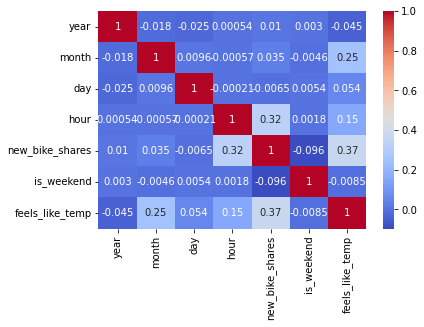

In [23]:
#Creating heatmap for better visualization

sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

There is a high correlation of feels like temperature with new_bike_shares, 0.37 to be exact compared to other variables. A conclusion can be drawn as the two variables has a monotonic relationship.

Hypothesis:
H1: There is a dependency between the columns.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that “feels like” temperature has an effect on the number of bike shares

In [46]:
#Testing Hypothesis with Spearman’s Rank Correlation
from scipy.stats import spearmanr

data1 = df['feels_like_temp']
data2 = df['new_bike_shares']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    print("Hypothesis is true")

stat=0.387, p=0.000
Probably dependent
Hypothesis is true


In [47]:
##Testing Hypothesis with Kendall’s Rank Correlation
from scipy.stats import kendalltau

data1 = df['new_bike_shares']
data2 = df['feels_like_temp']
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    print("Hypothesis is true")

stat=0.268, p=0.000
Probably dependent
Hypothesis is true


From both of these tests a conclusion can be drawn that the Hypothesis (H1) which is there is a dependency between the columns is true

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Programming Task 2

To perform this EDA task various libraries has to utilized such as pandas, matplot lib, seaborn, date-time and numpy as well as some correlation libraries to test the hypothesis. First for the FR1. I have read the two csv files using pandas and merge it into one dataframe using merge method in pandas. Then printed out the first five rows of the dataframe to analyse the structure of the dataframe. For FR2 Deleted the unnecessary column season_code using drop function and filtered the data according to the requirement.

I have performed a data pre-processing in order to complete the next tasks.such as Converting timestamp to datetime in pandas, Creating new columns for year, month, days, hours and name of the day, Converting int values of days to actual names of days, Altering the dataframe with only the required columns.

To Investigate the distribution of bike shares by time of the day, A bar plot has been created with hours of the day as for the x axis and the new share bikes count as the y axis. I have utilized seaborn and matplot lib to create the bar plot. To Compare the distribution of bike shares by time of the week, Firstly I have created a Pie Chart to analyse the weekdays and weekends contribution towards the dataframe, Afterwards Creating a bar plot to analyze the weekdays and weekends distribution as well as created a point plot to compare the distribution. Both plots can be used to compare. To Investigate the effects of “feels like” temperature on the number of bike shares I have created a scatter plot and came to a conclusion it has a monotonic relationship. And to analyse the correlation of the variables. I have created a heat map. To test the Hypothesis I have utilized two libraries for Spearman’s Rank Correlation and Kendall’s Rank Correlation. The test passed with the values.